# CSE 204 Lab 9: Decision Trees and Ensemble Methods

J.B. Scoggins

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/jbscoggi/teaching/blob/master/Polytechnique/CSE204/Lab9_answers.ipynb) 

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/jbscoggi/teaching/master?filepath=Polytechnique%2FCSE204%2FLab9_answers.ipynb)



## Introduction to Pandas



In [9]:
# Import required packages
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import sklearn.tree as tr
import graphviz

# Setup pandas options
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format


## Understanding your dataset

Compiled from census data in 1990.  See [data description](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) for more information.

In [2]:
# Get the housing data
housing_data = pd.read_csv(
    "https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

# Reindex and scale median house value
housing_data = housing_data.reindex(
    np.random.permutation(housing_data.index))

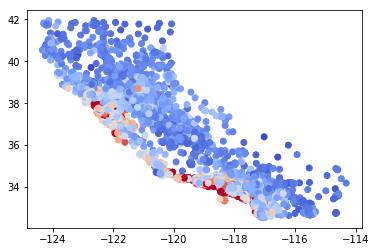

In [3]:
# Get to know your dataset
#housing_data.describe()

#plt.plot(housing_data['median_income'], housing_data['median_house_value'], 'k.')

# Adding synthetic data
#housing_data["rooms_per_person"] = housing_data["total_rooms"] / housing_data["population"]
#housing_data.corr()

#housing_data
#housing_data.describe()
#plt.plot(housing_data['median_income'], housing_data['median_house_value'], 'k.')

plt.scatter(
    housing_data['longitude'], housing_data['latitude'], 
    cmap="coolwarm",
    c=housing_data['median_house_value'] / housing_data['median_house_value'].max()
)



In [4]:
#plt.scatter(housing_data['longitude'], housing_data['latitude'])
# plt.scatter(housing_data['total_rooms'], housing_data['total_bedrooms'])
# plt.scatter(housing_data['total_rooms'], housing_data['population'])
# plt.scatter(housing_data['total_rooms'], housing_data['households'])
#plt.scatter(housing_data['median_income'], housing_data['median_house_value'])



In [5]:
# Split the data into train and test
def preprocess_examples(data_frame, feature_names, target_name):
    # Preprocess features
    copy = data_frame.copy()
    copy['median_house_value'] /= 1000.0
    
    # Synthetic features
    copy['rooms_per_person'] = copy['total_rooms'] / copy['population']
    
    # Create new dataframe with only features we want
    features = copy[feature_names]  
    
    # Create a target dataframe
    target = copy[target_name]
    return features, target

In [23]:
feature_names = [
    "latitude",
    "longitude",
    "housing_median_age",
    "rooms_per_person",
    #"total_bedrooms",
    #"population",
    "households",
    "median_income"
]

training_features, training_target = preprocess_examples(
    housing_data.head(12000), feature_names, 'median_house_value')
testing_features, testing_target = preprocess_examples(
    housing_data.tail(5000), feature_names, 'median_house_value')
training_features.describe()

,latitude,longitude,housing_median_age,rooms_per_person,households,median_income
count,12000.0,12000.0,12000.0,12000.0,12000.0,12000.0
mean,35.6,-119.6,28.6,2.0,501.1,3.9
std,2.1,2.0,12.6,1.2,385.1,1.9
min,32.5,-124.3,1.0,0.0,1.0,0.5
25%,33.9,-121.8,18.0,1.5,281.0,2.6
50%,34.2,-118.5,29.0,1.9,408.0,3.6
75%,37.7,-118.0,37.0,2.3,605.0,4.8
max,42.0,-114.5,52.0,55.2,6082.0,15.0


In [24]:
training_target.describe()

count   12000.0
mean      208.1
std       116.7
min        15.0
25%       120.0
50%       180.4
75%       266.7
max       500.0
Name: median_house_value, dtype: float64

In [25]:
tree = tr.DecisionTreeRegressor(max_depth=10)
tree.fit(training_features, training_target)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

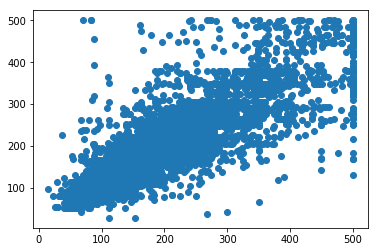

In [26]:
prediction = tree.predict(testing_features)
plt.scatter(testing_target, prediction)

# plt.scatter(
#     testing_features['longitude'], testing_features['latitude'], 
#     cmap="coolwarm",
#     c=prediction / prediction.max()
# )

In [ ]:
dot_data = sk.tree.export_graphviz(
    tree, out_file=None, feature_names=feature_names, filled=True, 
    rounded=True, special_characters=True)
graph = graphviz.Source(dot_data) 
graph 